# Feature Selection for Regression Data

Source: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

# Step0: Define Input Output

In [2]:
##Define parameters
dataType = "normReadCount"
enzyme = "Act_BetaGlucosidase"
medium = "WS"
method = "LinearRegression"

numPreSelectGene = 50

##Define output
pathOut = "C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\2_experiment_feature_important\\2_pythonNoteBook_normReadCount\\"
outFileListGene50 = pathOut+"50_"+dataType+"_"+enzyme.replace("Act_","")+"_"+medium+"_"+method+".txt"
outFileTopGene = pathOut+"top_"+dataType+"_"+enzyme.replace("Act_","")+"_"+medium+"_"+method+".txt"

# Step1: Data Loading and preparing

In [3]:
##Import Required Modules
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
##Loading Data (CSV format)
#url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/1_input_normReadCount_profile.csv'
url = "C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\2_experiment_feature_important\\1_input_expression\\1_input_normReadCount_lot2_cutGene.csv"
dataLot2=pd.read_csv(url)
dataLot2.head()
dataLot2 =  dataLot2[dataLot2['medium']==medium]

In [5]:
##Loading functional mapping file
url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/function.xlsx'
function=pd.read_excel(url)
#function.head()

In [6]:
##Loading functional mapping file
b = open("C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\1_data_exploration\\function.txt",'r').readlines()
del b[0]##delete header

funMap = {}
for i in b:
    iList = i.replace("\n","").split("\t")
    key = iList[1]
    value = iList[11]+"|"+iList[18]
    funMap[key] = value

In [7]:
dataLot2

,strain,Lot,medium,sampleName,time,strain_medium,strain_time,strain_lot,medium_time,Act_CMCase,...,acu08286_1,acu08287_1,acu08288_1,acu08289_1,acu08290_1,acu08291_1,acu08292_1,acu08293_1,acu08294_1,acu08295_1
4,BCC199,Lot2,WS,BCC199_S3K,Day3,BCC199_S,BCC199_H3,BCC199_Lot2,WS_Day3,8.229,...,12.350391,238.326348,37.114879,3.063707,2.031854,1.000000,116.567613,3087.274383,59.815660,55.688246
5,BCC199,Lot2,WS,BCC199_S3L,Day3,BCC199_S,BCC199_H3,BCC199_Lot2,WS_Day3,7.114,...,57.097389,209.495298,55.227476,11.284521,4.739826,1.934956,109.454953,3144.323724,63.642085,110.389910
6,BCC199,Lot2,WS,BCC199_S6T,Day6,BCC199_S,BCC199_H6,BCC199_Lot2,WS_Day6,14.978,...,50.341839,132.578236,72.271545,25.122677,120.516898,13.061338,13.061338,3037.167796,64.596147,20.736735
7,BCC199,Lot2,WS,BCC199_S6U,Day6,BCC199_S,BCC199_H6,BCC199_Lot2,WS_Day6,12.771,...,32.591339,141.405950,96.944066,9.190347,79.393322,16.210645,3.340099,3143.753178,43.121785,6.850248
12,BCC56535,Lot2,WS,BCC56535_S3K,Day3,BCC56535_S,BCC56535_H3,BCC56535_Lot2,WS_Day3,5.157,...,30.920496,656.445870,52.425853,9.415140,59.905977,8.480124,349.760784,4770.514101,272.154497,1.935016
13,BCC56535,Lot2,WS,BCC56535_S3L,Day3,BCC56535_S,BCC56535_H3,BCC56535_Lot2,WS_Day3,4.266,...,46.581752,732.333884,76.969586,23.284412,52.659319,30.374907,751.579513,5221.629971,691.816771,2.012928
14,BCC56535,Lot2,WS,BCC56535_S6T,Day6,BCC56535_S,BCC56535_H6,BCC56535_Lot2,WS_Day6,9.498,...,47.662694,844.110048,981.977100,196.134904,541.863049,55.086305,23.270831,1484.661581,175.985104,2.060516
15,BCC56535,Lot2,WS,BCC56535_S6U,Day6,BCC56535_S,BCC56535_H6,BCC56535_Lot2,WS_Day6,9.200,...,183.932393,904.901236,2577.705471,930.335686,2014.234571,241.649030,66.542622,1781.411525,100.781305,1.978248
20,HUT2365,Lot2,WS,HUT2365_S3K,Day3,HUT2365_S,HUT2365_H3,HUT2365_Lot2,WS_Day3,9.910,...,22.167330,71.557767,83.905376,15.111553,329.093615,20.403386,1631.766382,2216.513873,20.403386,28.341135
21,HUT2365,Lot2,WS,HUT2365_S3L,Day3,HUT2365_S,HUT2365_H3,HUT2365_Lot2,WS_Day3,10.599,...,72.673780,59.234946,95.071836,3.986407,302.627156,24.891260,2893.335651,1456.873650,5.479611,12.945630


In [8]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [9]:
featureData = dataLot2.iloc[0:24,17:8632]##split feature value
featureList = list(featureData.columns)
X=dataLot2.iloc[0:24,17:8632].to_numpy()
Y=dataLot2[enzyme].to_numpy()

# Step2: Feature Selection

In [10]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [11]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

##Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

C:\Users\wutto\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


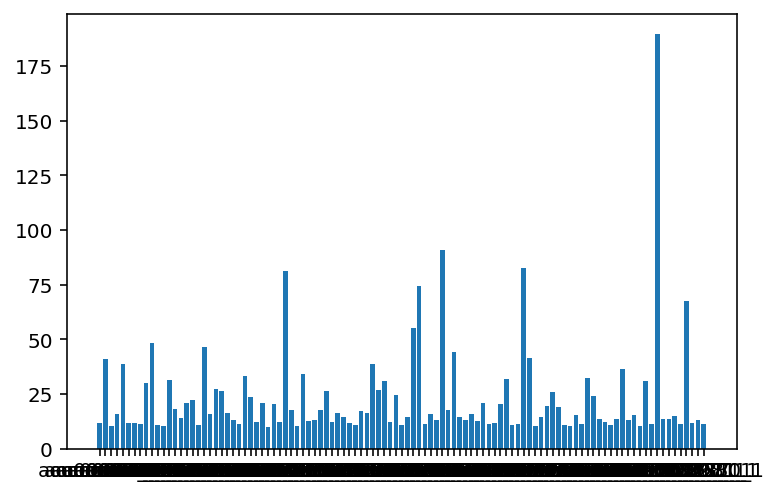

In [12]:
import matplotlib.pyplot as plt
# what are scores for the features
importantFeature = {}
dataPlotFeature = []
dataPlotScore = []
score = {}

for i in range(len(fs.scores_)):
    if fs.scores_[i] > 10:
        key = featureList[i]
        value = []
        value.append(fs.scores_[i])##Score
        value.append(funMap[featureList[i]])##Function
        importantFeature[key] = value
        dataPlotFeature.append(featureList[i])
        dataPlotScore.append(fs.scores_[i])
        
        ##Adding data into score variable
        score[fs.scores_[i]] = [featureList[i],funMap[featureList[i]]]
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.bar(dataPlotFeature,dataPlotScore)

plt.show()

In [13]:
##ดึงค่าและเรียงลำดับ feature ที่สำคัญจากน้อยไปมาก
scoreSort = list(score.keys())
scoreSort.sort()
scoreSort.reverse()

##Save selected feature
saveFile = open(outFileListGene50,"w")
header = ["InputType","Enzyme","Medium","Method","GeneId","Score","Function"]
saveFile.write("\t".join(header))
saveFile.write("\n")

for i in scoreSort[0:numPreSelectGene]:
    dataRecord = dataType+"\t"+enzyme.replace("Act_","")+"\t"+medium+"\t"+method+"\t"+score[i][0]+"\t"+str(i)+"\t"+score[i][1]+"\n"
    saveFile.write(dataRecord)
    print (dataRecord)
saveFile.close()



normReadCount	BetaGlucosidase	WS	LinearRegression	acu07563_1	189.50183624169387	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	WS	LinearRegression	acu03451_1	90.86898011685025	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	WS	LinearRegression	acu04756_1	82.50355782063878	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	WS	LinearRegression	acu00913_1	81.21815053409827	FAD binding domain protein|IPR012951;IPR016166;IPR036318;IPR016167;IPR016169;IPR006094;

normReadCount	BetaGlucosidase	WS	LinearRegression	acu03235_1	74.60337867578679	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	WS	LinearRegression	acu07898_1	67.63818082752996	Uncharacterized protein|IPR018466;

normReadCount	BetaGlucosidase	WS	LinearRegression	acu03059_1	55.12015282205313	S-adenosyl-L-methionine-dependent methyltransferase|IPR025799;IPR041698;IPR029063;IPR036236;

normReadCount	BetaGlucosidase	WS	LinearRegression	acu00106_1	48.166782026059565	Nucleoside-diphosph

################################################################################

In [14]:
#หลังจากที่ได้ทำการคัดเลือก feature ที่มีความสัมพันธ์กันกับค่า enzyme activity มากที่สุดแล้ว
#ขั้นตอนต่อไปคือการนำ feature เหล่านั้นมาทำการสร้าง Regression Model สำหรับทำนาย
#ค่า Enzyme activity

# Step3: Optimize Number of Features by Accumulated Adjusted R-square

In [15]:
##Loading Required library
import sklearn
from sklearn.linear_model import LinearRegression
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.1


In [16]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
##คำนวณ Percent Accumulated Adjusted R-square
featureScore = {}
for i in importantFeature.keys():
    featureScore[importantFeature[i][0]] = i

In [18]:
featureScoreList = list(featureScore.keys())
featureScoreList.sort()
featureScoreList.reverse()
#featureScoreList ## ==> sorted feature score
topFeatureList = []
for i in featureScoreList:
    topFeatureList.append(featureScore[i])

In [19]:
## ทดสอบหาจำนวน feature ที่เหมาะสมในการสร้างโมเดล
saveFile = open(outFileTopGene,"w")
header = ["No.feature","featureId(geneId)","Adj. R square","No.increasingValue","function"]
saveFile.write("\t".join(header))
saveFile.write("\n")

numBestFeature = 0
cutoff = 0.99
accum_adj_Rsquare = []
selectedFeature = []

print ("\t".join(header))

for feature in topFeatureList:
    selectedFeature.append(feature)
    A=dataLot2[selectedFeature]
    B=dataLot2[enzyme].to_numpy()
    model.fit(A, B)
    score = model.score(A, B)
    accum_adj_Rsquare.append(score)
    
    geneFunction = funMap[feature]##Function
    if len(selectedFeature) > 1:
        dataRecord = str(len(selectedFeature))+"\t"+feature+"\t"+str(score)+"\t"+str(score-accum_adj_Rsquare[-2])+"\t"+geneFunction+"\n"
        print (dataRecord)
    else:
        dataRecord = str(len(selectedFeature))+"\t"+feature+"\t"+str(score)+"\t"+str(score-accum_adj_Rsquare[0])+"\t"+geneFunction+"\n"
        print (dataRecord)
        
    saveFile.write(dataRecord)
    
    if score >= cutoff:
        numBestFeature = len(selectedFeature)
        break
        
saveFile.close()
accum_adj_Rsquare = np.array(accum_adj_Rsquare)

No.feature	featureId(geneId)	Adj. R square	No.increasingValue	function
1	acu07563_1	0.6599890588270033	0.0	Uncharacterized protein|noData

2	acu03451_1	0.6717781984870833	0.011789139660079995	Uncharacterized protein|noData

3	acu04756_1	0.8467699790009554	0.1749917805138721	Uncharacterized protein|noData

4	acu00913_1	0.848257094530228	0.001487115529272609	FAD binding domain protein|IPR012951;IPR016166;IPR036318;IPR016167;IPR016169;IPR006094;

5	acu03235_1	0.8483976020782542	0.00014050754802619192	Uncharacterized protein|noData

6	acu07898_1	0.9418500345327587	0.09345243245450452	Uncharacterized protein|IPR018466;

7	acu03059_1	0.9890856132471806	0.047235578714421855	S-adenosyl-L-methionine-dependent methyltransferase|IPR025799;IPR041698;IPR029063;IPR036236;

8	acu00106_1	0.9938526153036809	0.004767002056500269	Nucleoside-diphosphate-sugar epimerase family protein|IPR036291;IPR008030;



พักจบก่อนครับ